# Data Overview

This notebook contains code to load data used in publication and make representative plots. Data from the full MD simulations are block averages. This is necessary to reduce high-frequency noise due to the stochasticity inherent in molecular dynamics simulations, and to compress the data to a reasonable file size. All other data are unmodified except as needed to make units consistent across the data set.

The raw data set is over 10 GB and can be provided upon request, along with the Jupyter notebook used to make the production figures.

## File structure
The data is split into the three test cases, two-species temperature relaxation, two-species momentum relaxation, and single bump-on-tail relaxation. Within each are three sub-directories corresponding to results from the full MD used as a reference (`md`), results using the HMM method we developed (`hmm`), and Vlasov-BGK results using Stanton-Murillo cross-sections (`vbgk`). Filenames describe the variable contained and corresponding units as appropriate.

### Temperature relaxation
This case tests relaxation to thermal equilibrium of initially 1000 eV hydrogen ions and 500 eV aluminum ions. Species have zero initial velocity. For most per-species variables, the last index indicates the species. 0 is hydrogen. 1 is aluminum. Shape of arrays is indicated as a tuple in parentheses. For relaxation rates $\tau_{kl}$, the second-to-last and last indices correspond to the $k$ and $l$ indices, respectively.

#### MD
1. `time_ps.npy`: (# time steps) Time in picoseconds.
2. `T_eV.npy`: (5, # time steps, 2) Temperature history in eV of each species for each of the 5 MD runs.
3. `energy.npy`: (5, # time steps, 3) Total (final index 0), potential (final index 1), and kinetic (final index 2) energy in the MD system for each of the 5 MD runs. Values are total over all particles, in atomic units.

#### HMM
The HMM test cases shown are as follows:
1. `*pcc_opt*` : HMM using the optimization procedure to compute $\tau_{H,Al}/\tau_{Al,H}$ and the error metric to determine when to recompute the rates.
2. `*pcc_temp*` : HMM using the temperature relaxation assumption for the ratio $\tau_{H,Al}/\tau_{Al,H}$ and the error metric to determine when to recompute the rates.
3. `*ot_opt*` : HMM using the optimization procedure to compute $\tau_{H,Al}/\tau_{Al,H}$ but computing the rates only once at the beginning of the simulation.

For each case we have the following data:
1. `time_*_ps.npy` : (# time steps) Time in picoseconds.
2. `T_*_eV.npy`: (# time steps, 2) Temperature history in eV of each species.
3. `update_times_*_ps.npy`: (# updates) Times when MD was used to update the rates.
4. `update_taus_*_s.npy`: (# updates, 2, 2) Relaxation rates (unit is seconds) computed at each update.

#### VBGK
These results assume temperature relaxation rates to compute $\tau_{H,Al}/\tau_{Al,H}$.
1. `time_ps.npy`: (# time steps) Time in picoseconds.
2. `T_eV.npy`: (# time steps, 2) Temperature history in eV of each species.
3. `taus_s.npy`: (# time steps, 2) Relaxation rates (unit is seconds) at each time step.

### Momentum relaxation
This case tests relaxation to thermal equilibrium of initially 250 eV hydrogen and helium ions, where the hydrogen initially has bulk velocity corresponding to its thermal speed. For most per-species variables, the last index indicates the species. 0 is hydrogen. 1 is helium. Shape of arrays is indicated as a tuple in parentheses. For relaxation rates $\tau_{kl}$, the second-to-last and last indices correspond to the $k$ and $l$ indices, respectively.
#### MD
1. `time_ps.npy`: (# time steps) Time in picoseconds.
2. `T_eV.npy`: (5, # time steps, 2) Temperature history in eV of each species for each of the 5 MD runs.
3. `u_cmps.npy`: (5, # time steps, 2) Bulk $x$-velocity history in cm/s of each species for each of the 5 MD runs.

#### HMM
The HMM test cases shown are as follows:
1. `*pcc_opt*` : HMM using the optimization procedure to compute $\tau_{H,He}/\tau_{He,H}$ and the error metric to determine when to recompute the rates.
2. `*pcc_temp*` : HMM using the temperature relaxation assumption for the ratio $\tau_{H,He}/\tau_{He,H}$ and the error metric to determine when to recompute the rates.
2. `*pcc_mom*` : HMM using the momentum relaxation assumption for the ratio $\tau_{H,He}/\tau_{He,H}$ and the error metric to determine when to recompute the rates.
3. `*ot_opt*` : HMM using the optimization procedure to compute $\tau_{H,He}/\tau_{He,H}$ but computing the rates only once at the beginning of the simulation.

For each case we have the following data:
1. `time_*_ps.npy` : (# time steps) Time in picoseconds.
2. `T_*_eV.npy`: (# time steps, 2) Temperature history in eV of each species.
2. `u_*_cmps.npy`: (# time steps, 2) Bulk $x$-velocity history in cm/s of each species.
3. `update_times_*_ps.npy`: (# updates) Times when MD was used to update the rates.
4. `update_taus_*_s.npy`: (# updates, 2, 2) Relaxation rates (unit is seconds) computed at each update.

#### VBGK
We tested both the temperature (`*temp*`) and momentum (`*mom*`) relaxation assumptions to compute $\tau_{H,Al}/\tau_{Al,H}$.
1. `time_*_ps.npy`: (# time steps) Time in picoseconds.
2. `T_*_eV.npy`: (# time steps, 2) Temperature history in eV of each species.
3. `u_*_cmps.npy`: (# time steps, 2) Bulk $x$-velocity history in cm/s of each species.
4. `taus_*_s.npy`: (# time steps, 2) Relaxation rates (unit is seconds) at each time step.

### Bump-on-tail relaxation
This case tests relaxation to thermal equilibrium of hydrogen initialized with non-equlilibrium bump-on-tail distribution. The only relaxation rate in this case is $\tau_{H,H}$.

#### MD
1. `time_ps.npy`: (# time steps) Time in picoseconds.
2. `Tx_eV.npy`: (5, # time steps) 3 times the $x$-component of the diagonal of the temperature tensor in eV for each of the 5 MD runs.
3. `Tyz_eV.npy`: (5, # time steps) 3 times the mean of the $y$- and $z-$ components of the diagonal of the temperature tensor in eV for each of the 5 MD runs.
4. `qx_eV.npy`: (5, # time steps) $x$-component of the vector heat transfer in $\mathrm{erg}\,\mathrm{cm}^{-2}\mathrm{s}^{-1}$ for each of the 5 MD runs.
5. `kurtosis.npy`: (5, # time steps) history of the kurtosis for each of the 5 MD runs.
6. `velocity_grid_cmps.npy`: (100) Velocity grid used for histogramming velocities to compute $f(v_x, t)$.
7. `vx_distribution_cmps4.npy`: (5, # time steps, 100) $x$-velocity distribution in cm/$\mathrm{s}^4$ ($y$- and $z$- dependence integrated out) computed from particle velocities for each of the 5 MD runs.

#### HMM
1. `time_ps.npy`: (# time steps) Time in picoseconds.
2. `Tx_eV.npy`: (# time steps) 3 times the $x$-component of the diagonal of the temperature tensor in eV.
3. `Tyz_eV.npy`: (# time steps) 3 times the mean of the $y$- and $z-$ components of the diagonal of the temperature tensor in eV.
4. `qx_eV.npy`: (# time steps) $x$-component of the vector heat transfer in $\mathrm{erg}\,\mathrm{cm}^{-2}\mathrm{s}^{-1}$.
5. `kurtosis.npy`: (# time steps) history of the kurtosis.
6. `velocity_grid_cmps.npy`: (100) Velocity discretization for the macroscale simulation.
7. `vx_distribution_cmps4.npy`: (# time steps, 100) $x$-velocity distribution in cm/$\mathrm{s}^4$ ($y$- and $z$- dependence integrated out).
8. `update_times_ps.npy`: (# updates) Times when MD was used to update the relaxation rate.
9. `update_taus_s.npy`: (# updates) Relaxation rate in seconds computed at each update.

#### VBGK
1. `time_ps.npy`: (# time steps) Time in picoseconds.
2. `Tx_eV.npy`: (# time steps) 3 times the $x$-component of the diagonal of the temperature tensor in eV.
3. `Tyz_eV.npy`: (# time steps) 3 times the mean of the $y$- and $z-$ components of the diagonal of the temperature tensor in eV.
4. `qx_eV.npy`: (# time steps) $x$-component of the vector heat transfer in $\mathrm{erg}\,\mathrm{cm}^{-2}\mathrm{s}^{-1}$.
5. `kurtosis.npy`: (# time steps) history of the kurtosis.
6. `velocity_grid_cmps.npy`: (100) Velocity discretization for the macroscale simulation.
7. `vx_distribution_cmps4.npy`: (# time steps, 100) $x$-velocity distribution in cm/$\mathrm{s}^4$ ($y$- and $z$- dependence integrated out).
9. `taus_s.npy`: (# timesteps) Relaxation rate in seconds.

# Dependencies

This notebook requires Python3, matplotlib, and numpy to execute. It assumes the data directory structure is unmodified.

In [19]:
import os
import math

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib.collections import LineCollection

rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
rc('font',**{'family':'monospace','monospace':['Computer Modern typewriter']})
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

%matplotlib inline

### Unit conversions and constants

In [42]:
eV2erg = 1.60217662e-12
mH = 1.6737236e-24
mAl = 4.4803895e-23
mHe = 6.6464764e-24
qH = 1
qAl = 11.5355
qHe = 2
n_vel = 100

# Load data

In [21]:
data_dir = 'data_archive'
temp_dir = os.path.join(data_dir, 'temperature_relaxation')
mom_dir = os.path.join(data_dir, 'momentum_relaxation')
bot_dir = os.path.join(data_dir, 'BoT_relaxation')

## Temperature relaxation

In [22]:
md_dir_temp = os.path.join(temp_dir, 'md')
hmm_dir_temp = os.path.join(temp_dir, 'hmm')
bgk_dir_temp = os.path.join(temp_dir, 'vbgk')

### MD

In [23]:
time_md_temp = np.load(os.path.join(md_dir_temp, 'time_ps.npy'))
T_md_temp = np.load(os.path.join(md_dir_temp, 'T_eV.npy'))
energy_md_temp = np.load(os.path.join(md_dir_temp, 'energy.npy'))

### HMM

In [24]:
time_hmm_temp_pcc_opt = np.load(os.path.join(hmm_dir_temp, 'time_pcc_opt_ps.npy'))
time_hmm_temp_pcc_temp = np.load(os.path.join(hmm_dir_temp, 'time_pcc_temp_ps.npy'))
time_hmm_temp_ot_opt = np.load(os.path.join(hmm_dir_temp, 'time_ot_opt_ps.npy'))

T_hmm_temp_pcc_opt = np.load(os.path.join(hmm_dir_temp, 'T_pcc_opt_eV.npy'))
T_hmm_temp_pcc_temp = np.load(os.path.join(hmm_dir_temp, 'T_pcc_temp_eV.npy'))
T_hmm_temp_ot_opt = np.load(os.path.join(hmm_dir_temp, 'T_ot_opt_eV.npy'))

update_times_hmm_temp_pcc_opt = np.load(os.path.join(hmm_dir_temp, 'update_times_pcc_opt_ps.npy'))
update_times_hmm_temp_pcc_temp = np.load(os.path.join(hmm_dir_temp, 'update_times_pcc_temp_ps.npy'))
update_times_hmm_temp_ot_opt = np.load(os.path.join(hmm_dir_temp, 'update_times_ot_opt_ps.npy'))

update_taus_hmm_temp_pcc_opt = np.load(os.path.join(hmm_dir_temp, 'update_taus_pcc_opt_s.npy'))
update_taus_hmm_temp_pcc_temp = np.load(os.path.join(hmm_dir_temp, 'update_taus_pcc_temp_s.npy'))
update_taus_hmm_temp_ot_opt = np.load(os.path.join(hmm_dir_temp, 'update_taus_ot_opt_s.npy'))

### VBGK

In [25]:
time_bgk_temp = np.load(os.path.join(bgk_dir_temp, 'time_ps.npy'))
T_bgk_temp = np.load(os.path.join(bgk_dir_temp, 'T_eV.npy'))
taus_bgk_temp = np.load(os.path.join(bgk_dir_temp, 'taus_s.npy'))

## Momentum Relaxation

In [26]:
md_dir_mom = os.path.join(mom_dir, 'md')
hmm_dir_mom = os.path.join(mom_dir, 'hmm')
bgk_dir_mom = os.path.join(mom_dir, 'vbgk')

### MD

In [27]:
time_md_mom = np.load(os.path.join(md_dir_mom, 'time_ps.npy'))
T_md_mom = np.load(os.path.join(md_dir_mom, 'T_eV.npy'))
u_md_mom = np.load(os.path.join(md_dir_mom, 'u_cmps.npy'))

### HMM

In [28]:
time_hmm_mom_pcc_opt = np.load(os.path.join(hmm_dir_mom, 'time_pcc_opt_ps.npy'))
time_hmm_mom_pcc_temp = np.load(os.path.join(hmm_dir_mom, 'time_pcc_temp_ps.npy'))
time_hmm_mom_pcc_mom = np.load(os.path.join(hmm_dir_mom, 'time_pcc_mom_ps.npy'))
time_hmm_mom_ot_opt = np.load(os.path.join(hmm_dir_mom, 'time_ot_opt_ps.npy'))

T_hmm_mom_pcc_opt = np.load(os.path.join(hmm_dir_mom, 'T_pcc_opt_eV.npy'))
T_hmm_mom_pcc_temp = np.load(os.path.join(hmm_dir_mom, 'T_pcc_temp_eV.npy'))
T_hmm_mom_pcc_mom = np.load(os.path.join(hmm_dir_mom, 'T_pcc_mom_eV.npy'))
T_hmm_mom_ot_opt = np.load(os.path.join(hmm_dir_mom, 'T_ot_opt_eV.npy'))

u_hmm_mom_pcc_opt = np.load(os.path.join(hmm_dir_mom, 'u_pcc_opt_cmps.npy'))
u_hmm_mom_pcc_temp = np.load(os.path.join(hmm_dir_mom, 'u_pcc_temp_cmps.npy'))
u_hmm_mom_pcc_mom = np.load(os.path.join(hmm_dir_mom, 'u_pcc_mom_cmps.npy'))
u_hmm_mom_ot_opt = np.load(os.path.join(hmm_dir_mom, 'u_ot_opt_cmps.npy'))

update_times_hmm_mom_pcc_opt = np.load(os.path.join(hmm_dir_mom, 'update_times_pcc_opt_ps.npy'))
update_times_hmm_mom_pcc_temp = np.load(os.path.join(hmm_dir_mom, 'update_times_pcc_temp_ps.npy'))
update_times_hmm_mom_pcc_mom = np.load(os.path.join(hmm_dir_mom, 'update_times_pcc_mom_ps.npy'))
update_times_hmm_mom_ot_opt = np.load(os.path.join(hmm_dir_mom, 'update_times_ot_opt_ps.npy'))

update_taus_hmm_mom_pcc_opt = np.load(os.path.join(hmm_dir_mom, 'update_taus_pcc_opt_s.npy'))
update_taus_hmm_mom_pcc_temp = np.load(os.path.join(hmm_dir_mom, 'update_taus_pcc_temp_s.npy'))
update_taus_hmm_mom_pcc_mom = np.load(os.path.join(hmm_dir_mom, 'update_taus_pcc_mom_s.npy'))
update_taus_hmm_mom_ot_opt = np.load(os.path.join(hmm_dir_mom, 'update_taus_ot_opt_s.npy'))

### VBGK

In [29]:
time_bgk_mom_temp = np.load(os.path.join(bgk_dir_mom, 'time_temp_ps.npy'))
T_bgk_mom_temp = np.load(os.path.join(bgk_dir_mom, 'T_temp_eV.npy'))
u_bgk_mom_temp = np.load(os.path.join(bgk_dir_mom, 'u_temp_cmps.npy'))
taus_bgk_mom_temp = np.load(os.path.join(bgk_dir_mom, 'taus_temp_s.npy'))

time_bgk_mom_mom = np.load(os.path.join(bgk_dir_mom, 'time_mom_ps.npy'))
T_bgk_mom_mom = np.load(os.path.join(bgk_dir_mom, 'T_mom_eV.npy'))
u_bgk_mom_mom = np.load(os.path.join(bgk_dir_mom, 'u_mom_cmps.npy'))
taus_bgk_mom_mom = np.load(os.path.join(bgk_dir_mom, 'taus_mom_s.npy'))

## Bump-on-tail relaxation

In [30]:
md_dir_bot = os.path.join(bot_dir, 'md')
hmm_dir_bot = os.path.join(bot_dir, 'hmm')
bgk_dir_bot = os.path.join(bot_dir, 'vbgk')

### MD

In [31]:
time_md_bot = np.load(os.path.join(md_dir_bot, 'time_ps.npy'))
Tx_md_bot = np.load(os.path.join(md_dir_bot, 'Tx_eV.npy'))
Tyz_md_bot = np.load(os.path.join(md_dir_bot, 'Tyz_eV.npy'))
qx_md_bot = np.load(os.path.join(md_dir_bot, 'qx_ergpcm2s.npy'))
kurtosis_md_bot = np.load(os.path.join(md_dir_bot, 'kurtosis.npy'))
v_grid_md_bot = np.load(os.path.join(md_dir_bot, 'velocity_grid_cmps.npy'))
vx_distribution_md_bot = np.load(os.path.join(md_dir_bot, 'vx_distribution_spcm4.npy'))

### HMM

In [32]:
time_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'time_ps.npy'))
Tx_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'Tx_eV.npy'))
Tyz_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'Tyz_eV.npy'))
qx_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'qx_ergpcm2s.npy'))
kurtosis_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'kurtosis.npy'))
v_grid_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'velocity_grid_cmps.npy'))
vx_distribution_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'vx_distribution_spcm4.npy'))
update_times_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'update_times_ps.npy'))
update_taus_hmm_bot = np.load(os.path.join(hmm_dir_bot, 'update_taus_s.npy'))

### VBGK

In [33]:
time_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'time_ps.npy'))
Tx_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'Tx_eV.npy'))
Tyz_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'Tyz_eV.npy'))
qx_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'qx_ergpcm2s.npy'))
kurtosis_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'kurtosis.npy'))
v_grid_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'velocity_grid_cmps.npy'))
vx_distribution_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'vx_distribution_spcm4.npy'))
taus_bgk_bot = np.load(os.path.join(bgk_dir_bot, 'taus_s.npy'))

# Plots

## Temperature relaxation

### Temperature history

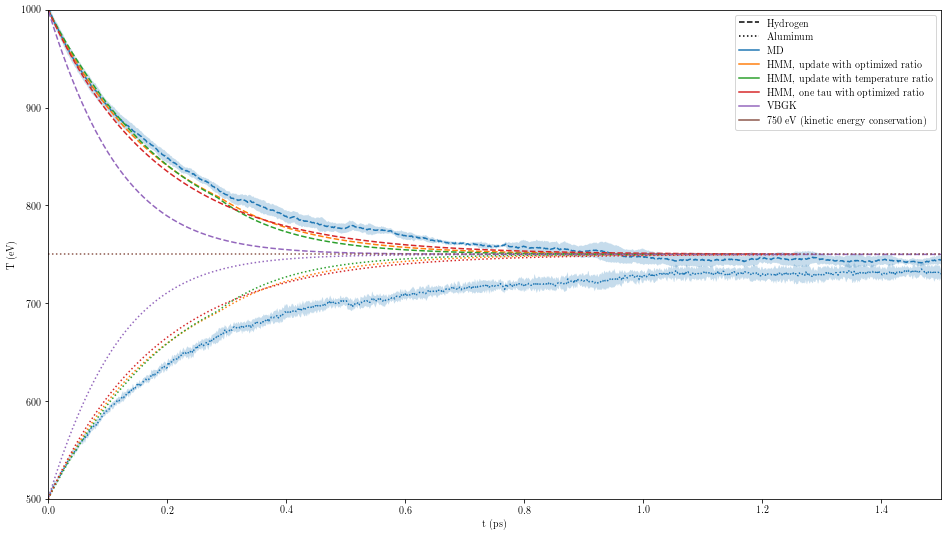

In [34]:
plt.figure(figsize=(16, 9))

# dummy lines for legend
plt.plot([0, 0], [0, 0], 'k--', label='Hydrogen')
plt.plot([0, 0], [0, 0], 'k:', label='Aluminum')
plt.plot([0, 0], [0, 0], c='C0', label='MD')
plt.plot([0, 0], [0, 0], c='C1', label='HMM, update with optimized ratio')
plt.plot([0, 0], [0, 0], c='C2', label='HMM, update with temperature ratio')
plt.plot([0, 0], [0, 0], c='C3', label='HMM, one tau with optimized ratio')
plt.plot([0, 0], [0, 0], c='C4', label='VBGK')
plt.plot([0, 0], [0, 0], c='C5', label='750 eV (kinetic energy conservation)')

# MD
plt.plot(time_md_temp, T_md_temp.mean(axis=0)[:,0], '--', c='C0')
plt.plot(time_md_temp, T_md_temp.mean(axis=0)[:,1], ':', c='C0')
plt.fill_between(time_md_temp,
                 T_md_temp.mean(axis=0)[:,0] - T_md_temp.std(axis=0)[:,0],
                 T_md_temp.mean(axis=0)[:,0] + T_md_temp.std(axis=0)[:,0],
                 facecolor='C0', alpha=0.25)
plt.fill_between(time_md_temp,
                 T_md_temp.mean(axis=0)[:,1] - T_md_temp.std(axis=0)[:,1],
                 T_md_temp.mean(axis=0)[:,1] + T_md_temp.std(axis=0)[:,1],
                 facecolor='C0', alpha=0.25)

# HMM
plt.plot(time_hmm_temp_pcc_opt, T_hmm_temp_pcc_opt[:,0], '--', c='C1')
plt.plot(time_hmm_temp_pcc_opt, T_hmm_temp_pcc_opt[:,1], ':', c='C1')
plt.plot(time_hmm_temp_pcc_temp, T_hmm_temp_pcc_temp[:,0], '--', c='C2')
plt.plot(time_hmm_temp_pcc_temp, T_hmm_temp_pcc_temp[:,1], ':', c='C2')
plt.plot(time_hmm_temp_ot_opt, T_hmm_temp_ot_opt[:,0], '--', c='C3')
plt.plot(time_hmm_temp_ot_opt, T_hmm_temp_ot_opt[:,1], ':', c='C3')

# VBGK
plt.plot(time_bgk_temp, T_bgk_temp[:,0], '--', c='C4')
plt.plot(time_bgk_temp, T_bgk_temp[:,1], ':', c='C4')

# 750 eV kinetic energy conservation line
plt.plot([0, 2], [750, 750], ':', c='C5')

# plot formatting
plt.ylim(500, 1000)
plt.xlim(0, 1.5)
plt.xlabel('t (ps)')
plt.ylabel('T (eV)')
plt.legend()

### MD energy

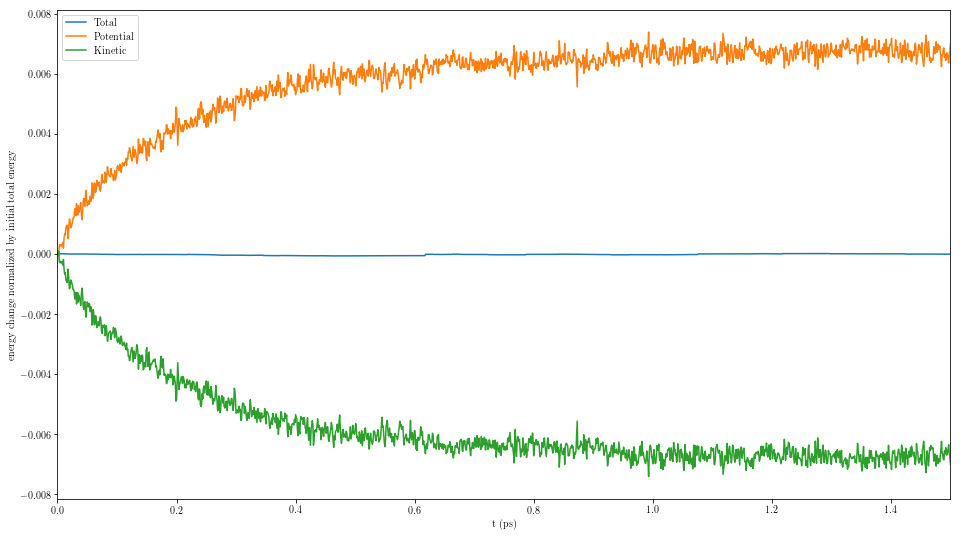

In [38]:
plt.figure(figsize=(16, 9))

plt.plot(time_md_temp,
         (energy_md_temp.mean(axis=0) - energy_md_temp.mean(axis=0)[0]) / energy_md_temp.mean(axis=0)[0,0])

plt.xlim(0, 1.5)
plt.legend(['Total', 'Potential', 'Kinetic'])
plt.xlabel('t (ps)')
plt.ylabel('energy change normalized by initial total energy')

### Relaxation rates

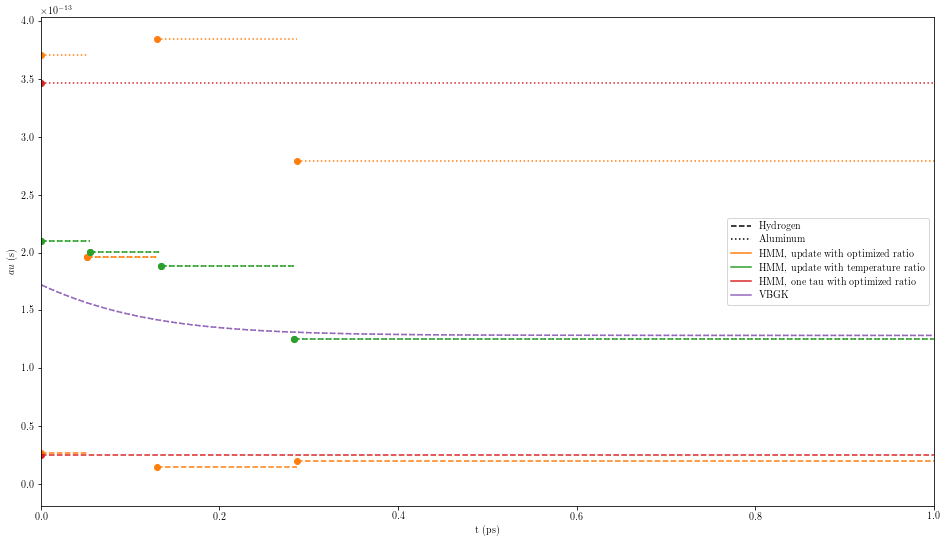

In [39]:
plt.figure(figsize=(16, 9))
t_final = 1

# dummy lines for legend
plt.plot([0, 0], [0, 0], 'k--', label='Hydrogen')
plt.plot([0, 0], [0, 0], 'k:', label='Aluminum')
plt.plot([0, 0], [0, 0], c='C1', label='HMM, update with optimized ratio')
plt.plot([0, 0], [0, 0], c='C2', label='HMM, update with temperature ratio')
plt.plot([0, 0], [0, 0], c='C3', label='HMM, one tau with optimized ratio')
plt.plot([0, 0], [0, 0], c='C4', label='VBGK')

# points
plt.plot(update_times_hmm_temp_pcc_opt, update_taus_hmm_temp_pcc_opt[:,0,1], 'o', c='C1')
plt.plot(update_times_hmm_temp_pcc_opt, update_taus_hmm_temp_pcc_opt[:,1,0], 'o', c='C1')
plt.plot(update_times_hmm_temp_pcc_temp, update_taus_hmm_temp_pcc_temp[:,0,1], 'o', c='C2')
plt.plot(update_times_hmm_temp_pcc_temp, update_taus_hmm_temp_pcc_temp[:,1,0], 'o', c='C2')
plt.plot(update_times_hmm_temp_ot_opt, update_taus_hmm_temp_ot_opt[:,0,1], 'o', c='C3')
plt.plot(update_times_hmm_temp_ot_opt, update_taus_hmm_temp_ot_opt[:,1,0], 'o', c='C3')

# lines
for i in range(len(update_times_hmm_temp_pcc_opt) - 1):
    plt.plot(update_times_hmm_temp_pcc_opt[i:i+2],
             [update_taus_hmm_temp_pcc_opt[i,0,1],  update_taus_hmm_temp_pcc_opt[i,0,1]],
             '--', c='C1')
    plt.plot(update_times_hmm_temp_pcc_opt[i:i+2],
             [update_taus_hmm_temp_pcc_opt[i,1,0],  update_taus_hmm_temp_pcc_opt[i,1,0]],
             ':', c='C1')
plt.plot([update_times_hmm_temp_pcc_opt[-1], t_final],
             [update_taus_hmm_temp_pcc_opt[-1,0,1],  update_taus_hmm_temp_pcc_opt[-1,0,1]],
             '--', c='C1')
plt.plot([update_times_hmm_temp_pcc_opt[-1], t_final],
         [update_taus_hmm_temp_pcc_opt[-1,1,0],  update_taus_hmm_temp_pcc_opt[-1,1,0]],
         ':', c='C1')
for i in range(len(update_times_hmm_temp_pcc_temp) - 1):
    plt.plot(update_times_hmm_temp_pcc_temp[i:i+2],
             [update_taus_hmm_temp_pcc_temp[i,0,1],  update_taus_hmm_temp_pcc_temp[i,0,1]],
             '--', c='C2')
    plt.plot(update_times_hmm_temp_pcc_temp[i:i+2],
             [update_taus_hmm_temp_pcc_temp[i,1,0],  update_taus_hmm_temp_pcc_temp[i,1,0]],
             ':', c='C2')
plt.plot([update_times_hmm_temp_pcc_temp[-1], t_final],
             [update_taus_hmm_temp_pcc_temp[-1,0,1],  update_taus_hmm_temp_pcc_temp[-1,0,1]],
             '--', c='C2')
plt.plot([update_times_hmm_temp_pcc_temp[-1], t_final],
         [update_taus_hmm_temp_pcc_temp[-1,1,0],  update_taus_hmm_temp_pcc_temp[-1,1,0]],
         ':', c='C2')
for i in range(len(update_times_hmm_temp_ot_opt) - 1):
    plt.plot(update_times_hmm_temp_ot_opt[i:i+2],
             [update_taus_hmm_temp_ot_opt[i,0,1],  update_taus_hmm_temp_ot_opt[i,0,1]],
             '--', c='C3')
    plt.plot(update_times_hmm_temp_ot_opt[i:i+2],
             [update_taus_hmm_temp_ot_opt[i,1,0],  update_taus_hmm_temp_ot_opt[i,1,0]],
             ':', c='C3')
plt.plot([update_times_hmm_temp_ot_opt[-1], t_final],
             [update_taus_hmm_temp_ot_opt[-1,0,1],  update_taus_hmm_temp_ot_opt[-1,0,1]],
             '--', c='C3')
plt.plot([update_times_hmm_temp_ot_opt[-1], t_final],
         [update_taus_hmm_temp_ot_opt[-1,1,0],  update_taus_hmm_temp_ot_opt[-1,1,0]],
         ':', c='C3')

plt.plot(time_bgk_temp, taus_bgk_temp[:,0,1], '--', c='C4')
plt.plot(time_bgk_temp, taus_bgk_temp[:,1,0], ':', c='C4')

plt.xlim(0, 1)
plt.xlabel('t (ps)')
plt.ylabel('$\tau$ (s)')
plt.legend()

## Momentum relaxation

###  Temperature history

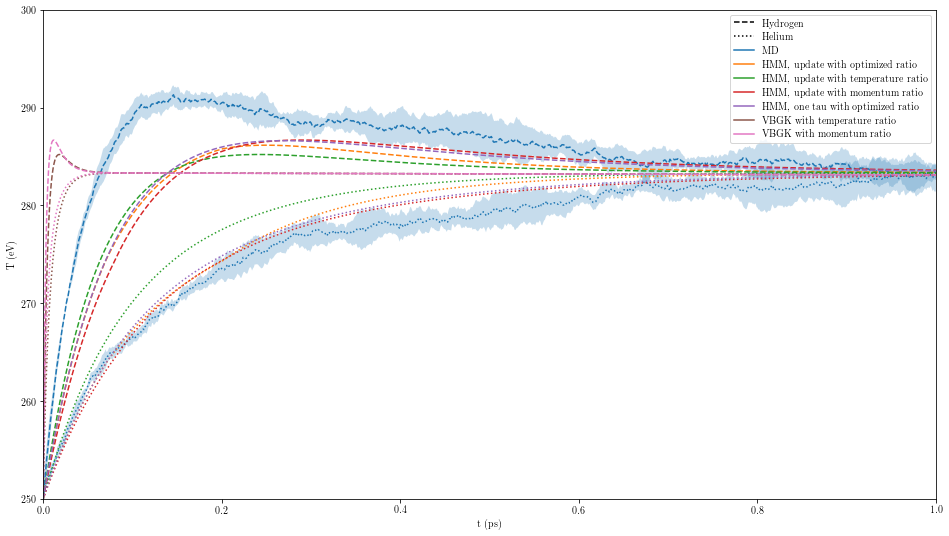

In [40]:
plt.figure(figsize=(16, 9))

# dummy lines for legend
plt.plot([0, 0], [0, 0], 'k--', label='Hydrogen')
plt.plot([0, 0], [0, 0], 'k:', label='Helium')
plt.plot([0, 0], [0, 0], c='C0', label='MD')
plt.plot([0, 0], [0, 0], c='C1', label='HMM, update with optimized ratio')
plt.plot([0, 0], [0, 0], c='C2', label='HMM, update with temperature ratio')
plt.plot([0, 0], [0, 0], c='C3', label='HMM, update with momentum ratio')
plt.plot([0, 0], [0, 0], c='C4', label='HMM, one tau with optimized ratio')
plt.plot([0, 0], [0, 0], c='C5', label='VBGK with temperature ratio')
plt.plot([0, 0], [0, 0], c='C6', label='VBGK with momentum ratio')

# MD
plt.plot(time_md_mom, T_md_mom.mean(axis=0)[:,0], '--', c='C0')
plt.plot(time_md_mom, T_md_mom.mean(axis=0)[:,1], ':', c='C0')
plt.fill_between(time_md_mom,
                 T_md_mom.mean(axis=0)[:,0] - T_md_mom.std(axis=0)[:,0],
                 T_md_mom.mean(axis=0)[:,0] + T_md_mom.std(axis=0)[:,0],
                 facecolor='C0', alpha=0.25)
plt.fill_between(time_md_mom,
                 T_md_mom.mean(axis=0)[:,1] - T_md_mom.std(axis=0)[:,1],
                 T_md_mom.mean(axis=0)[:,1] + T_md_mom.std(axis=0)[:,1],
                 facecolor='C0', alpha=0.25)

# HMM
plt.plot(time_hmm_mom_pcc_opt, T_hmm_mom_pcc_opt[:,0], '--', c='C1')
plt.plot(time_hmm_mom_pcc_opt, T_hmm_mom_pcc_opt[:,1], ':', c='C1')
plt.plot(time_hmm_mom_pcc_temp, T_hmm_mom_pcc_temp[:,0], '--', c='C2')
plt.plot(time_hmm_mom_pcc_temp, T_hmm_mom_pcc_temp[:,1], ':', c='C2')
plt.plot(time_hmm_mom_pcc_mom, T_hmm_mom_pcc_mom[:,0], '--', c='C3')
plt.plot(time_hmm_mom_pcc_mom, T_hmm_mom_pcc_mom[:,1], ':', c='C3')
plt.plot(time_hmm_mom_ot_opt, T_hmm_mom_ot_opt[:,0], '--', c='C4')
plt.plot(time_hmm_mom_ot_opt, T_hmm_mom_ot_opt[:,1], ':', c='C4')

# VBGK
plt.plot(time_bgk_mom_temp, T_bgk_mom_temp[:,0], '--', c='C5')
plt.plot(time_bgk_mom_temp, T_bgk_mom_temp[:,1], ':', c='C5')
plt.plot(time_bgk_mom_mom, T_bgk_mom_mom[:,0], '--', c='C6')
plt.plot(time_bgk_mom_mom, T_bgk_mom_mom[:,1], ':', c='C6')

# plot formatting
plt.ylim(250, 300)
plt.xlim(0, 1)
plt.xlabel('t (ps)')
plt.ylabel('T (eV)')
plt.legend()

###  Velocity history

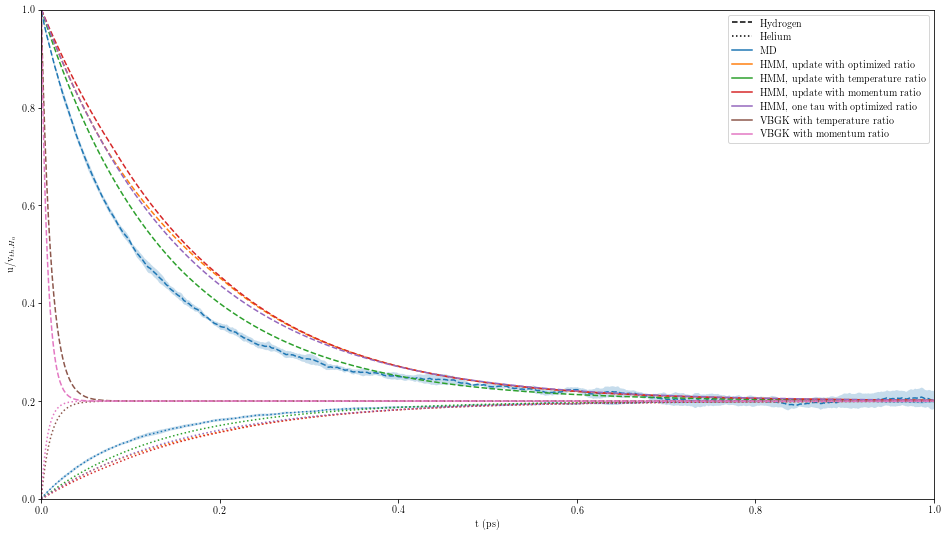

In [43]:
plt.figure(figsize=(16, 9))
vthH0 = np.sqrt(T_md_mom.mean(axis=0)[0,0] * eV2erg / mH)

# dummy lines for legend
plt.plot([0, 0], [0, 0], 'k--', label='Hydrogen')
plt.plot([0, 0], [0, 0], 'k:', label='Helium')
plt.plot([0, 0], [0, 0], c='C0', label='MD')
plt.plot([0, 0], [0, 0], c='C1', label='HMM, update with optimized ratio')
plt.plot([0, 0], [0, 0], c='C2', label='HMM, update with temperature ratio')
plt.plot([0, 0], [0, 0], c='C3', label='HMM, update with momentum ratio')
plt.plot([0, 0], [0, 0], c='C4', label='HMM, one tau with optimized ratio')
plt.plot([0, 0], [0, 0], c='C5', label='VBGK with temperature ratio')
plt.plot([0, 0], [0, 0], c='C6', label='VBGK with momentum ratio')

# MD
plt.plot(time_md_mom, u_md_mom.mean(axis=0)[:,0] / vthH0, '--', c='C0')
plt.plot(time_md_mom, u_md_mom.mean(axis=0)[:,1] / vthH0, ':', c='C0')
plt.fill_between(time_md_mom,
                 u_md_mom.mean(axis=0)[:,0] / vthH0 - u_md_mom.std(axis=0)[:,0] / vthH0,
                 u_md_mom.mean(axis=0)[:,0] / vthH0 + u_md_mom.std(axis=0)[:,0] / vthH0,
                 facecolor='C0', alpha=0.25)
plt.fill_between(time_md_mom,
                 u_md_mom.mean(axis=0)[:,1] / vthH0 - u_md_mom.std(axis=0)[:,1] / vthH0,
                 u_md_mom.mean(axis=0)[:,1] / vthH0 + u_md_mom.std(axis=0)[:,1] / vthH0,
                 facecolor='C0', alpha=0.25)

# HMM
plt.plot(time_hmm_mom_pcc_opt, u_hmm_mom_pcc_opt[:,0] / vthH0, '--', c='C1')
plt.plot(time_hmm_mom_pcc_opt, u_hmm_mom_pcc_opt[:,1] / vthH0, ':', c='C1')
plt.plot(time_hmm_mom_pcc_temp, u_hmm_mom_pcc_temp[:,0] / vthH0, '--', c='C2')
plt.plot(time_hmm_mom_pcc_temp, u_hmm_mom_pcc_temp[:,1] / vthH0, ':', c='C2')
plt.plot(time_hmm_mom_pcc_mom, u_hmm_mom_pcc_mom[:,0] / vthH0, '--', c='C3')
plt.plot(time_hmm_mom_pcc_mom, u_hmm_mom_pcc_mom[:,1] / vthH0, ':', c='C3')
plt.plot(time_hmm_mom_ot_opt, u_hmm_mom_ot_opt[:,0] / vthH0, '--', c='C4')
plt.plot(time_hmm_mom_ot_opt, u_hmm_mom_ot_opt[:,1] / vthH0, ':', c='C4')

# VBGK
plt.plot(time_bgk_mom_temp, u_bgk_mom_temp[:,0] / vthH0, '--', c='C5')
plt.plot(time_bgk_mom_temp, u_bgk_mom_temp[:,1] / vthH0, ':', c='C5')
plt.plot(time_bgk_mom_mom, u_bgk_mom_mom[:,0] / vthH0, '--', c='C6')
plt.plot(time_bgk_mom_mom, u_bgk_mom_mom[:,1] / vthH0, ':', c='C6')

# plot formatting
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('t (ps)')
plt.ylabel('$\mathrm{u} / \mathrm{v}_{th,H_0}$')
plt.legend()

### Relaxation rates

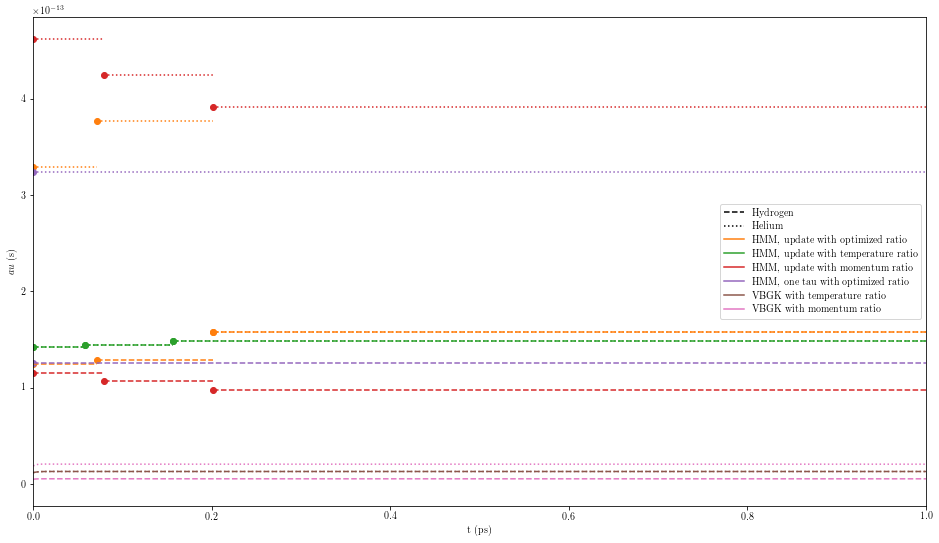

In [44]:
plt.figure(figsize=(16, 9))
t_final = 1

# dummy lines for legend
plt.plot([0, 0], [0, 0], 'k--', label='Hydrogen')
plt.plot([0, 0], [0, 0], 'k:', label='Helium')
plt.plot([0, 0], [0, 0], c='C1', label='HMM, update with optimized ratio')
plt.plot([0, 0], [0, 0], c='C2', label='HMM, update with temperature ratio')
plt.plot([0, 0], [0, 0], c='C3', label='HMM, update with momentum ratio')
plt.plot([0, 0], [0, 0], c='C4', label='HMM, one tau with optimized ratio')
plt.plot([0, 0], [0, 0], c='C5', label='VBGK with temperature ratio')
plt.plot([0, 0], [0, 0], c='C6', label='VBGK with momentum ratio')

# points
plt.plot(update_times_hmm_mom_pcc_opt, update_taus_hmm_mom_pcc_opt[:,0,1], 'o', c='C1')
plt.plot(update_times_hmm_mom_pcc_opt, update_taus_hmm_mom_pcc_opt[:,1,0], 'o', c='C1')
plt.plot(update_times_hmm_mom_pcc_temp, update_taus_hmm_mom_pcc_temp[:,0,1], 'o', c='C2')
plt.plot(update_times_hmm_mom_pcc_temp, update_taus_hmm_mom_pcc_temp[:,1,0], 'o', c='C2')
plt.plot(update_times_hmm_mom_pcc_mom, update_taus_hmm_mom_pcc_mom[:,0,1], 'o', c='C3')
plt.plot(update_times_hmm_mom_pcc_mom, update_taus_hmm_mom_pcc_mom[:,1,0], 'o', c='C3')
plt.plot(update_times_hmm_mom_ot_opt, update_taus_hmm_mom_ot_opt[:,0,1], 'o', c='C4')
plt.plot(update_times_hmm_mom_ot_opt, update_taus_hmm_mom_ot_opt[:,1,0], 'o', c='C4')

# lines
for i in range(len(update_times_hmm_mom_pcc_opt) - 1):
    plt.plot(update_times_hmm_mom_pcc_opt[i:i+2],
             [update_taus_hmm_mom_pcc_opt[i,0,1],  update_taus_hmm_mom_pcc_opt[i,0,1]],
             '--', c='C1')
    plt.plot(update_times_hmm_mom_pcc_opt[i:i+2],
             [update_taus_hmm_mom_pcc_opt[i,1,0],  update_taus_hmm_mom_pcc_opt[i,1,0]],
             ':', c='C1')
plt.plot([update_times_hmm_mom_pcc_opt[-1], t_final],
             [update_taus_hmm_mom_pcc_opt[-1,0,1],  update_taus_hmm_mom_pcc_opt[-1,0,1]],
             '--', c='C1')
plt.plot([update_times_hmm_mom_pcc_opt[-1], t_final],
         [update_taus_hmm_mom_pcc_opt[-1,1,0],  update_taus_hmm_mom_pcc_opt[-1,1,0]],
         ':', c='C1')
for i in range(len(update_times_hmm_mom_pcc_temp) - 1):
    plt.plot(update_times_hmm_mom_pcc_temp[i:i+2],
             [update_taus_hmm_mom_pcc_temp[i,0,1],  update_taus_hmm_mom_pcc_temp[i,0,1]],
             '--', c='C2')
    plt.plot(update_times_hmm_mom_pcc_temp[i:i+2],
             [update_taus_hmm_mom_pcc_temp[i,1,0],  update_taus_hmm_mom_pcc_temp[i,1,0]],
             ':', c='C2')
plt.plot([update_times_hmm_mom_pcc_temp[-1], t_final],
             [update_taus_hmm_mom_pcc_temp[-1,0,1],  update_taus_hmm_mom_pcc_temp[-1,0,1]],
             '--', c='C2')
plt.plot([update_times_hmm_mom_pcc_temp[-1], t_final],
         [update_taus_hmm_mom_pcc_temp[-1,1,0],  update_taus_hmm_mom_pcc_temp[-1,1,0]],
         ':', c='C2')
for i in range(len(update_times_hmm_mom_pcc_mom) - 1):
    plt.plot(update_times_hmm_mom_pcc_mom[i:i+2],
             [update_taus_hmm_mom_pcc_mom[i,0,1],  update_taus_hmm_mom_pcc_mom[i,0,1]],
             '--', c='C3')
    plt.plot(update_times_hmm_mom_pcc_mom[i:i+2],
             [update_taus_hmm_mom_pcc_mom[i,1,0],  update_taus_hmm_mom_pcc_mom[i,1,0]],
             ':', c='C3')
plt.plot([update_times_hmm_mom_pcc_mom[-1], t_final],
             [update_taus_hmm_mom_pcc_mom[-1,0,1],  update_taus_hmm_mom_pcc_mom[-1,0,1]],
             '--', c='C3')
plt.plot([update_times_hmm_mom_pcc_mom[-1], t_final],
         [update_taus_hmm_mom_pcc_mom[-1,1,0],  update_taus_hmm_mom_pcc_mom[-1,1,0]],
         ':', c='C3')
for i in range(len(update_times_hmm_mom_ot_opt) - 1):
    plt.plot(update_times_hmm_mom_ot_opt[i:i+2],
             [update_taus_hmm_mom_ot_opt[i,0,1],  update_taus_hmm_mom_ot_opt[i,0,1]],
             '--', c='C4')
    plt.plot(update_times_hmm_mom_ot_opt[i:i+2],
             [update_taus_hmm_mom_ot_opt[i,1,0],  update_taus_hmm_mom_ot_opt[i,1,0]],
             ':', c='C4')
plt.plot([update_times_hmm_mom_ot_opt[-1], t_final],
             [update_taus_hmm_mom_ot_opt[-1,0,1],  update_taus_hmm_mom_ot_opt[-1,0,1]],
             '--', c='C4')
plt.plot([update_times_hmm_mom_ot_opt[-1], t_final],
         [update_taus_hmm_mom_ot_opt[-1,1,0],  update_taus_hmm_mom_ot_opt[-1,1,0]],
         ':', c='C4')

plt.plot(time_bgk_mom_temp, taus_bgk_mom_temp[:,0,1], '--', c='C5')
plt.plot(time_bgk_mom_temp, taus_bgk_mom_temp[:,1,0], ':', c='C5')
plt.plot(time_bgk_mom_mom, taus_bgk_mom_mom[:,0,1], '--', c='C6')
plt.plot(time_bgk_mom_mom, taus_bgk_mom_mom[:,1,0], ':', c='C6')

plt.xlim(0, 1)
plt.xlabel('t (ps)')
plt.ylabel('$\tau$ (s)')
plt.legend()

## Bump-on-tail relaxation

### Distribution snapshots

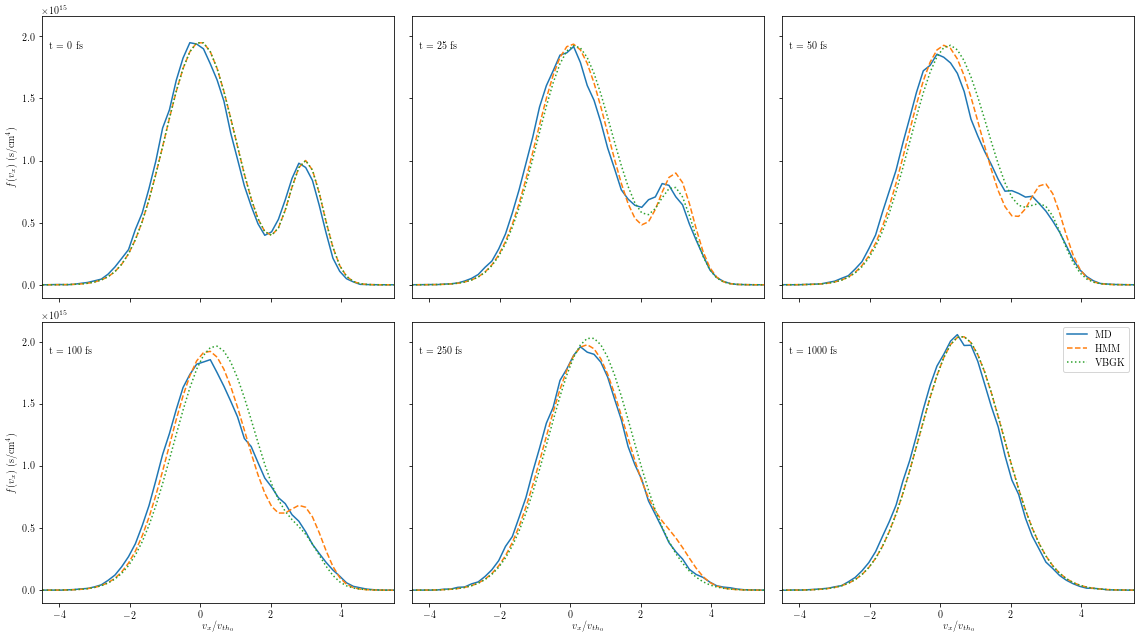

In [56]:
T0 = 100 # initial temperature of "bulk" species
vth0 = np.sqrt(T0 * eV2erg / mH)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex='all', sharey='all', figsize=(16, 9))

# timesteps to plot
t = [0, 25, 50, 100, 250, 1000]

# plot windows
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        ix = 3 * i + j
        
        # plot
        ax.plot(v_grid_md_bot / vth0, vx_distribution_md_bot.mean(axis=0)[t[ix]], '-', label='MD', c='C0')
        ax.plot(v_grid_hmm_bot / vth0, vx_distribution_hmm_bot[t[ix]], '--', label='HMM', c='C1')
        ax.plot(v_grid_bgk_bot / vth0, vx_distribution_bgk_bot[t[ix]], ':', label='VBGK', c='C2')
        
        # time label
        ax.text(-4.3, 1.9e15, 't = {:d} fs'.format(t[ix]))

# legend in last frame
ax.legend()

# axis labels and limits
for axs in axes:
    axs[0].set_ylabel(r'$f(v_x)$ (s/$\mathrm{cm}^4$)')
for ax in axes[1]:
    ax.set_xlabel(r'$v_x/v_{th_0}$')
axes[0][0].set_xlim(-4.5, 5.5)

plt.tight_layout()

### Diagonals of temperature tensor

(100, 230)

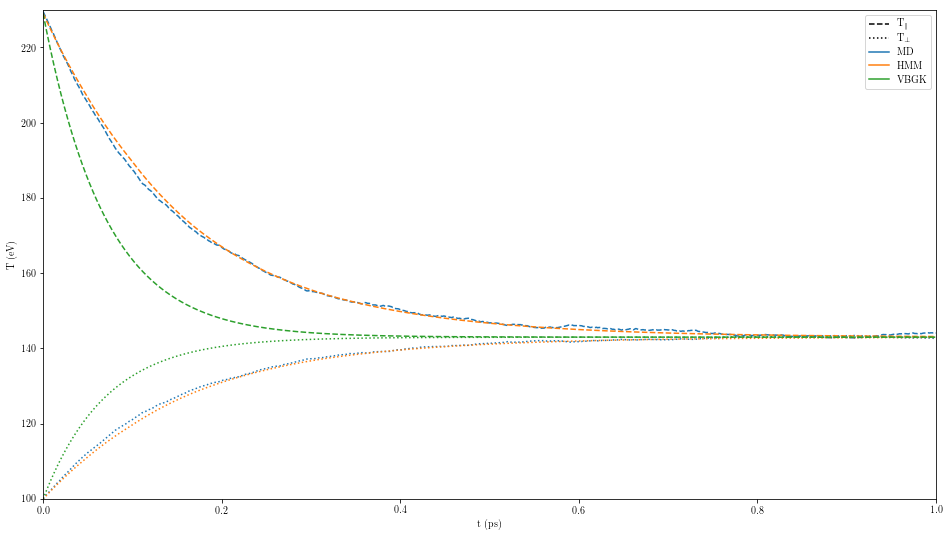

In [63]:
plt.figure(figsize=(16,9))

# dummy lines for legend
plt.plot([0, 0], [0, 0], 'k--', label='$\mathrm{T}_{\parallel}$')
plt.plot([0, 0], [0, 0], 'k:', label='$\mathrm{T}_{\perp}$')
plt.plot([0, 0], [0, 0], c='C0', label='MD')
plt.plot([0, 0], [0, 0], c='C1', label='HMM')
plt.plot([0, 0], [0, 0], c='C2', label='VBGK')

# plots
plt.plot(time_md_bot, Tx_md_bot.mean(axis=0), '--', c='C0')
plt.plot(time_md_bot, Tyz_md_bot.mean(axis=0), ':', c='C0')
plt.plot(time_hmm_bot, Tx_hmm_bot, '--', c='C1')
plt.plot(time_hmm_bot, Tyz_hmm_bot, ':', c='C1')
plt.plot(time_bgk_bot, Tx_bgk_bot, '--', c='C2')
plt.plot(time_bgk_bot, Tyz_bgk_bot, ':', c='C2')

# labels and legend
plt.xlabel('t (ps)')
plt.ylabel('T (eV)')
plt.legend()
plt.xlim(0, 1)
plt.ylim(100, 230)

### Heat transfer $x$-component

(0, 1)

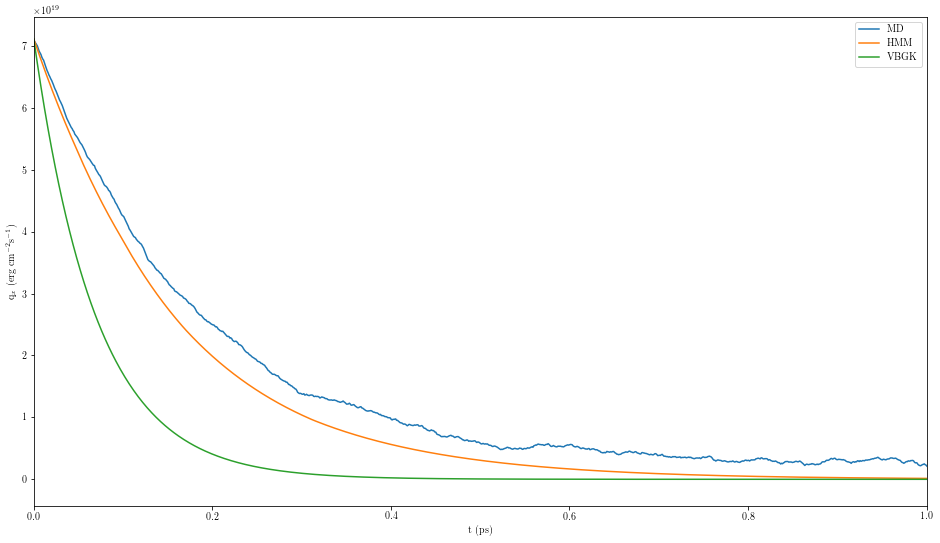

In [66]:
plt.figure(figsize=(16,9))

# dummy lines for legend
plt.plot([0, 0], [0, 0], c='C0', label='MD')
plt.plot([0, 0], [0, 0], c='C1', label='HMM')
plt.plot([0, 0], [0, 0], c='C2', label='VBGK')

# plots
plt.plot(time_md_bot, qx_md_bot.mean(axis=0), c='C0')
plt.plot(time_hmm_bot, qx_hmm_bot, c='C1')
plt.plot(time_bgk_bot, qx_bgk_bot, c='C2')

# labels and legend
plt.xlabel('t (ps)')
plt.ylabel('$\mathrm{q}_x$ (erg $\mathrm{cm}^{-2}\mathrm{s}^{-1}$)')
plt.legend()
plt.xlim(0, 1)


### Kurtosis

(14.55, 15.05)

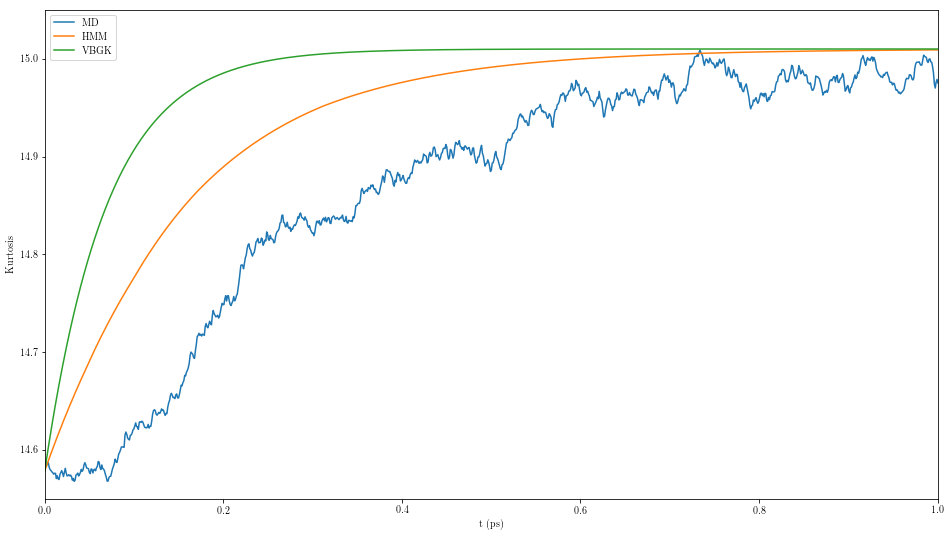

In [71]:
plt.figure(figsize=(16,9))

# dummy lines for legend
plt.plot([0, 0], [0, 0], c='C0', label='MD')
plt.plot([0, 0], [0, 0], c='C1', label='HMM')
plt.plot([0, 0], [0, 0], c='C2', label='VBGK')

# plots
plt.plot(time_md_bot, kurtosis_md_bot.mean(axis=0), c='C0')
plt.plot(time_hmm_bot, kurtosis_hmm_bot, c='C1')
plt.plot(time_bgk_bot, kurtosis_bgk_bot, c='C2')

# labels and legend
plt.xlabel('t (ps)')
plt.ylabel('Kurtosis')
plt.legend()
plt.xlim(0, 1)
plt.ylim(14.55, 15.05)

### Relaxation rates

(0, 1)

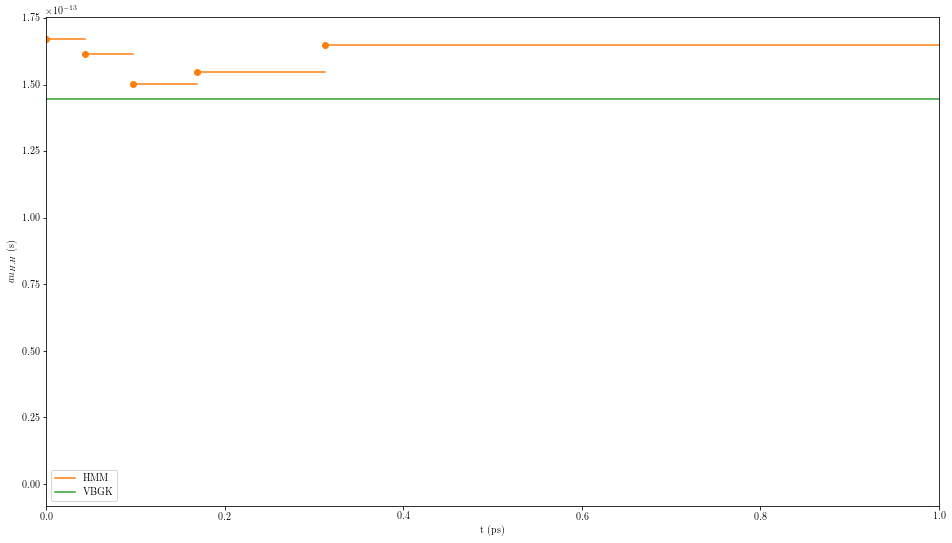

In [77]:
plt.figure(figsize=(16,9))
t_final = 1

# dummy lines for legend
plt.plot([0, 0], [0, 0], c='C1', label='HMM')
plt.plot([0, 0], [0, 0], c='C2', label='VBGK')

# plots
plt.plot(update_times_hmm_bot, update_taus_hmm_bot, 'o', c='C1')
for i in range(len(update_times_hmm_bot) - 1):
    plt.plot(update_times_hmm_bot[i:i+2],
             [update_taus_hmm_bot[i],  update_taus_hmm_bot[i]],
             c='C1')
plt.plot([update_times_hmm_bot[-1], t_final],
             [update_taus_hmm_bot[-1],  update_taus_hmm_bot[-1]],
             c='C1')

plt.plot(time_bgk_bot, taus_bgk_bot, c='C2')

# labels and legend
plt.xlabel('t (ps)')
plt.ylabel('$\tau_{H,H}$ (s)')
plt.legend()
plt.xlim(0, 1)
